In [107]:
import numpy as np

In [108]:
import pandas as pd

In [109]:
msg_csv = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])
msg_csv.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
#Calculating the length of message and add as 3rd column
msg_csv['length'] = msg_csv['message'].apply(len)
msg_csv.head()


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


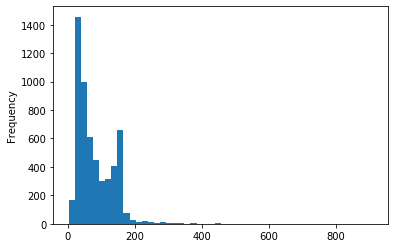

In [111]:
# Data Visualization
import matplotlib.pyplot as plot
%matplotlib inline

msg_csv['length'].plot(bins=50,kind='hist')

In [112]:
# Data preprocessing
import string
from nltk.corpus import stopwords

def text_prep(my_str):
    """
    Remove punctuation
    Remove stopwords
    
    """
    no_punc = [char for char in my_str if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    return [word for word in no_punc.split() if word not in stopwords.words('english')]
    
    

In [113]:
mess_pre = msg_csv['message'].apply(text_prep)

In [114]:
mess_pre.head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [115]:
msg_csv['message'] = mess_pre

In [116]:
msg_csv.head()

,label,message,length
0,ham,"[Go, jurong, point, crazy, Available, bugis, n...",111
1,ham,"[Ok, lar, Joking, wif, u, oni]",29
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",155
3,ham,"[U, dun, say, early, hor, U, c, already, say]",49
4,ham,"[Nah, I, dont, think, goes, usf, lives, around...",61


In [117]:
from sklearn.feature_extraction.text import CountVectorizer

In [118]:
bow_transformer = CountVectorizer(analyzer=text_prep).fit(msg_csv['message'])

In [119]:
msg_bow = bow_transformer.transform(msg_csv['message'])

In [120]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(msg_bow)
msg_tfidf = tfidf.transform(msg_bow)


In [121]:
from sklearn.naive_bayes import MultinomialNB
sp_detect = MultinomialNB().fit(msg_bow,msg_csv['label'])
all_predictions = sp_detect.predict(msg_tfidf)

In [122]:
from sklearn.metrics import classification_report
print (classification_report(msg_csv['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4825
        spam       1.00      0.04      0.07       747

    accuracy                           0.87      5572
   macro avg       0.94      0.52      0.50      5572
weighted avg       0.89      0.87      0.82      5572



In [126]:
#Prediction test
message4 = " ".join(msg_csv['message'][0])
print(message4)
bow4 = bow_transformer.transform([message4])
tfidf4 = tfidf.transform(bow4)
print('predicted:', sp_detect.predict(tfidf4)[0])
print('expected:', msg_csv.label[4])

Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
predicted: ham
expected: ham
